# Assignmnent: Convolution

---


Adding convolution on an image to sharpen it.

In [47]:
import cv2
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

### Reading the image

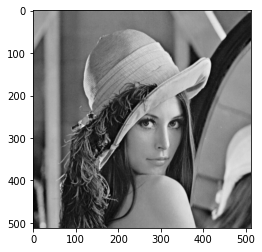

Image shape:  (512, 512)


In [48]:
img = cv2.imread('../images/lena.png', 0)
plt.imshow(img, cmap='gray')
plt.show()

print('Image shape: ', img.shape)

##### The convolution operation

$$
\begin{align}
\mathbf{\omega} &= \begin{bmatrix}
    0 & -1 & 0 \\
    -1 & 5 & - \\
    0 & -1 & 0
\end{bmatrix} \\
\end{align}
$$

$$
\begin{align}
\mathbf{g(x, y)} &= \mathbf{\omega} * \mathbf{f(x, y)} &= \sum_{i=0}^{2} \sum_{j=0}^{2} f(x + i, y + j) * \omega(i, j)
\end{align}
$$


Where g(x,y) is the filtered image, f(x,y) is the original image, w is the filter kernel.

### Convolution Function

In [49]:
def convolve(img, kernel, kernel_size: int):
    # Getting image shape, kernel size and padding size
    image_width, image_height = img.shape[:2]
    padding = (kernel_size - 1) // 2

    padded_img = cv2.copyMakeBorder(img, padding, padding, padding, padding, cv2.BORDER_REPLICATE)

    # Making an empty image for the output image with the same shape as the input image with zero values(black)
    output_img = np.zeros(img.shape, dtype=np.uint8)

    # Looping over the image and applying the convolution
    for x in range(padding, image_width + padding):
        for y in range(padding, image_height + padding):
            value = 0
            for i in range(-padding, padding + 1):
                for j in range(-padding, padding + 1):
                    value += padded_img[x + i, y + j] * kernel[i + padding, j + padding]
            output_img[x - padding, y - padding] = value
    
    return output_img

### The kernel

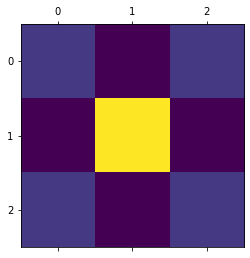

In [50]:
kernel = np.array(([0, -1, 0], [-1, 5, -1], [0, -1, 0]))
kernel_size = 3

plt.matshow(kernel)
plt.show()

### Convolution with `convolution` function and `filter2D`

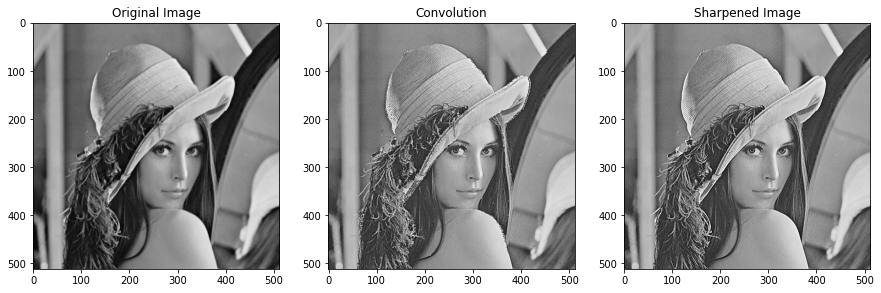

In [51]:
output_img = convolve(img, kernel, kernel_size)
sharpened_img = cv2.filter2D(img, -1, kernel)

figure, axis = plt.subplots(1, 3, figsize=(15, 15))
axis[0].imshow(img, cmap='gray')
axis[0].set_title('Original Image')
axis[1].imshow(output_img, cmap='gray')
axis[1].set_title('Convolution')
axis[2].imshow(sharpened_img, cmap='gray')
axis[2].set_title('Sharpened Image')
plt.show()

### Comapring the results

In [52]:
shape = [img.shape, output_img.shape, sharpened_img.shape]
size = [img.size, output_img.size, sharpened_img.size]
dtype = [img.dtype, output_img.dtype, sharpened_img.dtype]

max = [img.max(), output_img.max(), sharpened_img.max()]
min = [img.min(), output_img.min(), sharpened_img.min()]
mean = [img.mean(), output_img.mean(), sharpened_img.mean()]
std = [img.std(), output_img.std(), sharpened_img.std()]

df = pd.DataFrame({'Shape': shape, 'Size': size, 'Dtype': dtype, 'Max': max, 'Min': min, 'Mean': mean, 'Std': std})
df.rename(index={0: 'Original Image', 1: 'Convoluted Image', 2: 'Sharpened Image'}, inplace=True)
df.head()

,Shape,Size,Dtype,Max,Min,Mean,Std
Original Image,"(512, 512)",262144,uint8,-11,39,132.427296,44.902100
Convoluted Image,"(512, 512)",262144,uint8,-1,0,132.491749,50.495310
Sharpened Image,"(512, 512)",262144,uint8,-1,0,132.416882,50.816362


### Histograms of the original and filtered images

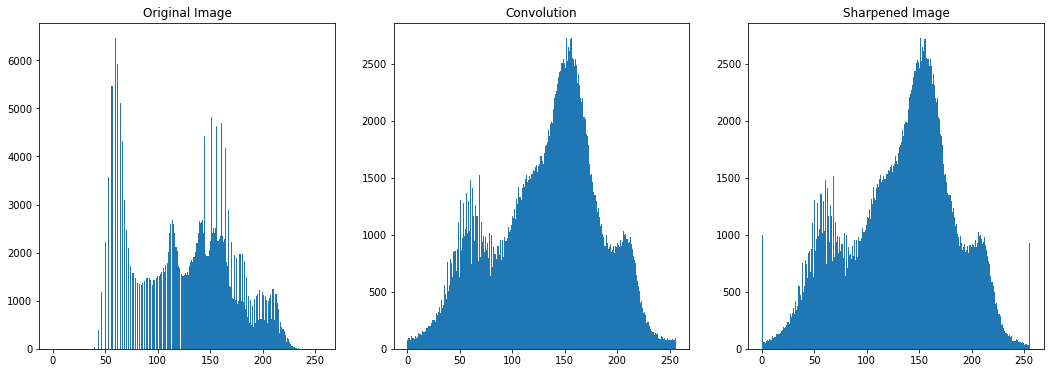

In [53]:
fig, axes = plt.subplots(nrows=1, ncols=3, figsize=(18, 6))
axes[0].hist(img.ravel(), 256, [0, 256])
axes[0].set_title('Original Image')
axes[1].hist(output_img.ravel(), 256, [0, 256])
axes[1].set_title('Convolution')
axes[2].hist(sharpened_img.ravel(), 256, [0, 256])
axes[2].set_title('Sharpened Image')
plt.show()
